# Zahlen voraussagen mit linearer Regression

*Intelligenz* (von lateinisch *intelligere*=erkennen, verstehen) kann auf unterschiedliche Weise definiert werden. Häufig wird Intelligenz definiert als die kognitive Fähigkeit, Probleme zu lösen. Dazu gehört auch die Vorhersage gewisser Werte (z.B.: Welches Video möchtest Du Dir als nächstes anschauen? Welche Route führt am schnellsten zum Ziel?).

Eine klassische Aufgabe der **künstlichen Intelligenz** besteht darin, für unbekannte Datenpunkte voraussagen zu treffen. Häufig beginnen Datenanalysen beim vergleich zweier Variablen, wie der folgenden:

![Beispielbild](Images/schlafdauer_vs_notenschnitt.jpg)

Basierend auf diesen Daten könnte man eine Voraussage zu folgender Frage zu treffen versuchen: 

**Welche Note werde ich erreichen, wenn ich im Schnitt X Stunden schlafe?**

Damit eine Voraussage getroffen werden, müssen die Variablen in einem ungefähr linearen Zusammenhang stehen.

Die unabhängige Variable hier ist die Schlafdauer, die abhängige Variable die Note. Im Allgemeinen ist die abhängige Variable diejenige, die wir vorhersagen wollen. Die unabhängige Variable ist diejenige, die wir zur Vorhersage verwenden. In diesem Fall ist die Schlafdauer die unabhängige Variable und die Note die abhängige Variable.

<div class="alert alert-block alert-success">

# Aufgabe 1
Welches sind im obigen Beispiel:

- *Unabhängige* Variable?
- *Abhängige* Variable?
</div>

**Antwort**:
- *Unabhängige Variable*: ...
- *Abhängige Variable*: ...

## Erste Schätzung

Um die Frage zu beantworten, welche Note man bei X Stunden Schlaf erreichen wird, könnte man versuchen, eine Linie auf der Grafik oben einzuzeichnen, welche möglichst genau den gemessenen Daten folgt.

In [49]:
# library pandas importieren (einmal pro Datei reicht)
import pandas as pd

In [50]:
# Datei einlesen und erste 5 Zeilen anzeigen
df = pd.read_csv("Data/schlafdauer_vs_notenschnitt.csv")
df.head()

,Schlafdauer,Notenschnitt
0,9.436518,6.000000
1,6.082365,5.004316
2,6.207742,4.823140
3,5.390547,4.614907
4,8.298111,6.000000


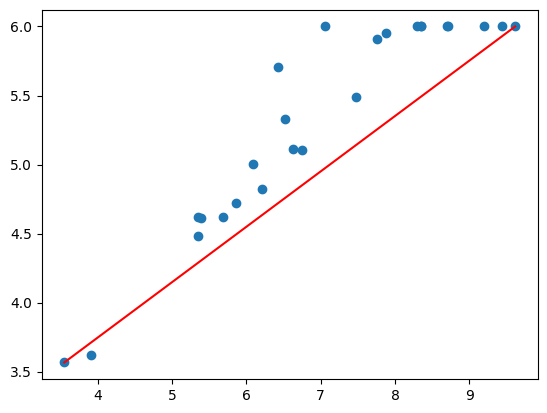

In [51]:
# Scatter plot zeichnen und kleinste sowie grösste Schlafdauer durch Linie verbinden
import matplotlib.pyplot as plt
plt.scatter(df["Schlafdauer"], df["Notenschnitt"])
plt.plot([df["Schlafdauer"].min(), df["Schlafdauer"].max()], [df["Notenschnitt"].min(), df["Notenschnitt"].max()], color="red")

Wie wir sehen, folgt die Linie nicht allzu schlecht den Daten.

<div class="alert alert-block alert-success">

# Aufgabe 2
Sie verwenden diese Linie, um vorherzusagen, was ihre Note sein wird, wenn sie x Stunden schlafen. Sie stellen jedoch fest, dass sie immer etwas danebenliegen. Ist ihre Note in echt besser oder schlechter als Ihre Vorhersage?
</div>

**Antwort**: ...

 ## Genauigkeit und Fehler einer linearen Vorhersage
 Im folgenden Abschnitt wollen wir uns anschauen, wie man die Qualität einer linearen Vorhersage (wie wir sie soeben gemacht haben) messen kann. 

Dafür wählen wir als erstes drei beliebige Datenpunkte aus. 
Mit dem Befehl `df.iloc[...]` können die Daten mit einer Liste von Index-Werten ausgewählt werden.

Danach zeichnen wir eine Linie vom kleinsten Schlafwert zum grössten Schlafwert (rot) sowie die Abweichung von der Linie (grün).

Den untenstehenden Code müssen Sie nicht im Detail verstehen.

</div>

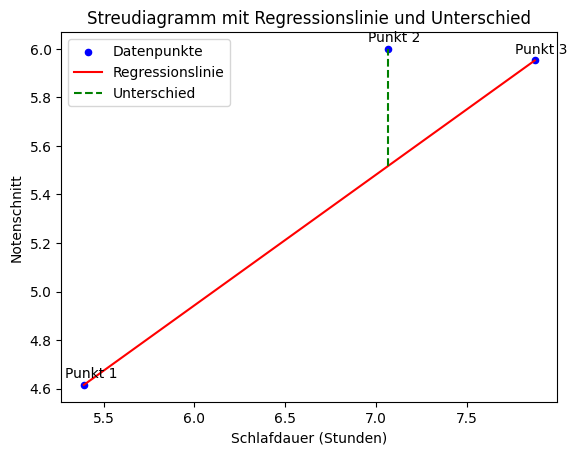

In [52]:
# Drei beliebige Zeilen auswählen und in einem neuen DataFrame speichern
df_sample = df.iloc[[3, 18, 19]]

# Streudiagramm für df_sample erstellen
df_sample.plot.scatter(x="Schlafdauer", y="Notenschnitt",
                       color="blue", label="Datenpunkte")

# Regressionslinie zwischen minimaler und maximaler Schlafdauer zeichnen
x_min_max = [df_sample["Schlafdauer"].iloc[0], df_sample["Schlafdauer"].iloc[-1]]
y_min_max = [df_sample["Notenschnitt"].iloc[0], df_sample["Notenschnitt"].iloc[-1]]
plt.plot(x_min_max, y_min_max, color="red", label="Regressionslinie")

# Punkte beschriften
for i, (x, y) in enumerate(zip(df_sample["Schlafdauer"], df_sample["Notenschnitt"])):
    plt.annotate(f"Punkt {i+1}", (x, y), textcoords="offset points", xytext=(5, 5), ha="center")

# Mittlerer Punkt
middle_point = df_sample.iloc[1]
middle_x = middle_point["Schlafdauer"]
middle_y = middle_point["Notenschnitt"]

# Vorhergesagter y-Wert auf der Regressionslinie für den mittleren Punkt
predicted_y = y_min_max[0] + (y_min_max[1] - y_min_max[0]) * \
    ((middle_x - x_min_max[0]) / (x_min_max[1] - x_min_max[0]))

# Vertikale Linie, die den Unterschied zeigt
plt.vlines(middle_x, ymin=predicted_y, ymax=middle_y,
           color="green", linestyle="dashed", label="Unterschied")

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.legend()
plt.title("Streudiagramm mit Regressionslinie und Unterschied")
plt.show()

In [53]:
# Abweichung des Punkts 2
predicted_y - middle_y

-0.48431293017731214

In [54]:
(-0.48431293017731214)**2

0.23455901433693402

## Die Qualität der Regressionslinie messen

Die Qualität der Regressionslinie wird gemessen als die Summe der quadrierten Abweichungen von der Linie. Im obigen Beispiel weichen die Punkte 1 und 3 nicht von der Linie ab, ihre Abweichung ist also 0. Punkt 3 weicht jedoch um -0.484 ab. Die Summe der quadrierten Abweichungen ist also:

$$0^2+(-0.484)^2+0^2= 0.235$$

Diesen Wert gilt es zu minimieren, um eine bestmöglich passende Regressionslinie zu finden, also eine, die alle Punkte möglichst realitätsgetreu abbildet.

Die lineare Regression ist ein Verfahren, um eine Regressionslinie für zwei Variablen zu finden, so dass die Summe der quadrierten Abweichungen zwischen den tatsächlichen y-Werten und den vorhergesagten y-Werten minimiert wird. Die Formeln zur Berechnung der Regressionskoeffizienten m und q sind:

$$m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}$$

$$q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(wobei die obige Formel für m eingefügt wird)}$$

Eine vollständige Herleitung dieser Formeln finden Sie im Anhang dieses Aufgabenblatts.

Damit Sie diese Formeln nicht in Python umsetzen müssen, können Sie das Statistik-Paket `statsmodels` verwenden.m

<div class="alert alert-block alert-info">
<img align="right" src="Images/statsmodels.svg" alt="statsmodels" width="200" />
<strong>Neues Paket: statsmodels</strong>

Statsmodels ist eine leistungsstarke Python-Bibliothek, die eine breite Palette an statistischen Modellen und Testverfahren für die Datenanalyse bietet. Sie ermöglicht es Benutzern, statistische Modelle zu schätzen, statistische Tests durchzuführen und Datenexploration zu betreiben.
</div>

In [55]:
import statsmodels.formula.api as smf # statsmodels als smf importieren

Um aus den gegebenen Daten die Steigung $m$ sowie den Abchsenabschnitt $q$ zu berechnen, verwenden wir die Methode der kleinsten Quadrate (englisch *OLS*=**O**rdinary ***L**east **S**quares).

Diese Methode minimiert die Summe der quadrierten Abweichungen zwischen den beobachteten Werten und den durch die Regressionsgerade vorhergesagten Werten und verwendet dazu die obige formel.

Wir können die OLS-Methode in Python mit der Bibliothek `statsmodels` und dem Befehl `smf.ols()` verwenden. Diese Methode erfordert eine Formel, die die abhängige und unabhängige Variable beschreibt, sowie die Daten, auf denen die Regression durchgeführt werden soll. Dabei wird das Gleichheitszeichen `~` verwendet, um die abhängige Variable von der unabhängigen Variable zu trennen. In diesem Fall ist die abhängige Variable `Notenschnitt` und die unabhängige Variable `Schlafdauer`. Die Formel lautet also `Notenschnitt ~ Schlafdauer`.



In [56]:
lm = smf.ols(formula="Notenschnitt ~ Schlafdauer", data=df).fit() # Regressionsmodell erstellen
lm.summary() # Zusammenfassung des Modells anzeigen

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Notenschnitt   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     160.3
Date:                Tue, 13 May 2025   Prob (F-statistic):           7.54e-12
Time:                        13:25:06   Log-Likelihood:                -2.3109
No. Observations:                  25   AIC:                             8.622
Df Residuals:                      23   BIC:                             11.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2767      0.246      9.267      0.000       1.768       2.785
Schlafdauer     0.4341      0.034     12.660      0.000       0.363       0.505
==============================================================================
Omnibus:                        4.989   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.146
Skew:                           0.796   Prob(JB):                        0.207
Kurtosis:                       3.698   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Die Zusammenfassung des Modells zeigt die Koeffizienten, die für die Regressionslinie verwendet werden, sowie viele weitere Statistiken, die die Güte der Anpassung und die Signifikanz der Variablen bewerten.

Um nur die Steigung und den Achsenabschnitt zu extrahieren, können Sie Folgendes tun:

In [57]:
# Steigung und Achsenabschnitt extrahieren
steigung = lm.params["Schlafdauer"]
achsenabschnitt = lm.params["Intercept"]

print(steigung, achsenabschnitt)

0.4340898794034307 2.2766665874126915


<div class="alert alert-block alert-success">

### Aufgabe
Verwenden Sie die Funktion `lm.predict()` um den Notenschnitt für eine Schlafdauer von 7.5 Stunden vorherzusagen.
</div>

In [58]:
s = pd.Series([7.5], name="Schlafdauer") # Vorhersage für 7.5 Stunden Schlaf 
lm.predict(s) # Vorhersage durchführen

0    5.532341
dtype: float64

**Antwort**: ...

<div class="alert alert-block alert-success">

### Aufgabe
Führen Sie die Zelle unten aus, um mit `matplotlib` die Datenpunkte und die Regressionsgerade zu zeichnen.
</div>

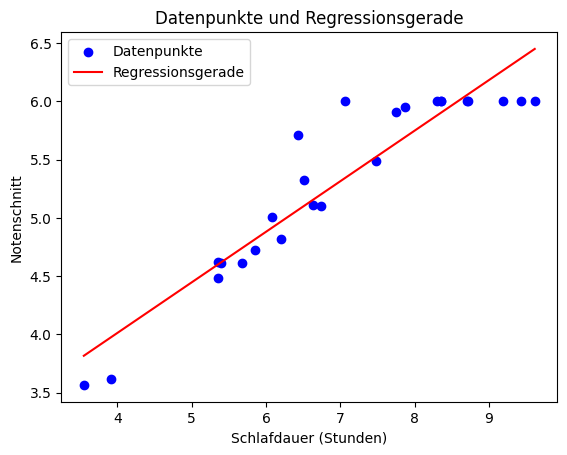

In [59]:
# Datenpunkte zeichnen
plt.scatter(df["Schlafdauer"], df["Notenschnitt"], label="Datenpunkte", color="blue")

# Regressionsgerade berechnen und zeichnen
x_values = [df["Schlafdauer"].min(), df["Schlafdauer"].max()]
y_values = [steigung * x + achsenabschnitt for x in x_values]
plt.plot(x_values, y_values, color="red", label="Regressionsgerade")

# Achsenbeschriftungen und Legende hinzufügen
plt.xlabel("Schlafdauer (Stunden)")
plt.ylabel("Notenschnitt")
plt.legend()
plt.title("Datenpunkte und Regressionsgerade")
plt.show()

# Ablauf Naoki
- Unabhängige vs. abhängige Variable
- Regression mit zwei Datenpunkten (**Nikos** Funktion mit drei Punkten, Abweichung schön gezeigt, Linie ausprobieren mit geogebra-Blatt)
- Vorgegebene Funktion, Differenz berechnen (**Nikos**: Plot schön eingezeichnet orange / rot)
- Scatter plot erstellen
- Formel erklären (aber ohne Anwendung)
- ols fitten mit smf.ols()
- Parameter von OLS auslesen, neue Daten vorhersagen
- Regressionsgerade einzeichnen
- Multiple Lineare Regression
- **Nikos**: Errors als Histogram anzeigen, überprüfen, wie gut einzelne NBA-Spieler vorhergesagt wurden

# Ablauf

- Einführung mit Beispiel Korrelation vs Kausalität: ist es sinnvoll, Daten vorherzusagen?
- Unabhängige vs. abhängige Variable: Begriffe kennen
- Zwei Punkte nehmen, um Vorhersage zu machen
- Fehler verstehen mit drei Punkten sowie allen Punkten, 
- Bessere Funktion suchen mit geogebra
- Lineare Regression einführen
- Lineare Regression mit smf.ols() anwenden
- Regressionsgerade und scatter plot zeichnen
- Error für bestehende Datentypen auslesen



## Challenge
- multiple lineare Regression: Lernzeit, Schlaf und Wasserkonsum vs. Schulnote
- Korrelation vs Kausalität mit Skript


## Appendix: Herleitung der Formeln für die einfache lineare Regression

### Definition der Zielfunktion
Das Ziel der linearen Regression besteht darin, die bestmögliche Gerade $y = mx + q$ zu finden, die die Summe der quadrierten Residuen zwischen den vorhergesagten Werten und den tatsächlichen Datenpunkten minimiert. Die Summe der quadrierten Abstände zwischen den Datenpunkten und der Geraden wird definiert als:
$$
S = \sum_{i=1}^n (y_i - (mx_i + q))^2
$$

### Partielle Ableitungen
Um $S$ zu minimieren, nehmen wir die partiellen Ableitungen bezüglich $m$ und $q$ und setzen diese gleich Null.

#### Partielle Ableitung nach $m$
$$
\frac{\partial S}{\partial m} = \frac{\partial}{\partial m} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-x_i)
$$
$$
= -2 \sum_{i=1}^n x_i(y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung:
$$
\sum x_iy_i - m\sum x_i^2 - q\sum x_i = 0
$$
$$
\sum x_iy_i = m\sum x_i^2 + q\sum x_i \quad \text{(Gleichung 1)}
$$

#### Partielle Ableitung nach $q$
$$
\frac{\partial S}{\partial q} = \frac{\partial}{\partial q} \sum_{i=1}^n (y_i - mx_i - q)^2
$$
$$
= \sum_{i=1}^n 2(y_i - mx_i - q)(-1)
$$
$$
= -2 \sum_{i=1}^n (y_i - mx_i - q)
$$
Auf Null setzen für die Minimierung:
$$
\sum y_i - m\sum x_i - nq = 0
$$
$$
\sum y_i = m\sum x_i + nq \quad \text{(Gleichung 2)}
$$

### Lösung der Gleichungen
Aus Gleichung 2:
$$
q = \frac{\sum y_i - m\sum x_i}{n} \quad \text{(Gleichung 3)}
$$
Einsetzen der Gleichung 3 in Gleichung 1:
$$
\sum x_iy_i = m\sum x_i^2 + \left(\frac{\sum y_i - m\sum x_i}{n}\right)\sum x_i
$$
$$
\sum x_iy_i = m\sum x_i^2 + \frac{(\sum y_i)\sum x_i}{n} - \frac{m(\sum x_i)^2}{n}
$$
Auflösen nach $m$:
$$
m = \frac{n\sum x_iy_i - \sum x_i \sum y_i}{n\sum x_i^2 - (\sum x_i)^2}
$$
Bestimmen von $q$ über Einsetzen von $m$ in Gleichung 3:
$$
q = \frac{\sum y_i - m\sum x_i}{n}
$$